In [3]:
import utils as ut
import ibllib.io.raw_data_loaders as raw
import pandas as pd
import numpy as np

In [4]:
# function for changing values to binary(ish) format
def changeVals(x):
    if x < 0:
        return 1
    else:
        return 2

### Getting the number of trials in each day 
* Run the same data processing as was used on a single file (above) on each file in the list of file paths for each day
    * create an empty list for day lengths
    * get the number of trials in each day and append it to the list



# Packing all data from one mouse into a single npz file
### Getting the path to the daily data files for a given mouse, and then fetching the session folder file paths
* get user choice of a folder for that mouse 
* generate dict w/ the file paths of each day as keys
* for each key, generate a list of the file paths contained w/in that folder  

In [5]:
# get user choice of folder path for a particular mouse
mouseFolderPath = ut.selectFolder()

# generate a list of the file paths of the subfolders to mouseFolderPath
mouseSessionsPaths_lst = ut.getSubfolders(mouseFolderPath)
mouseSessionsPaths_lst # should contain a list of folders titled by date 

2023-02-12 12:53:06.218 python[26627:17799716] +[CATransaction synchronize] called within transaction
2023-02-12 12:53:06.306 python[26627:17799716] +[CATransaction synchronize] called within transaction


['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-10-10',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-10-18',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-10-11',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-14',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-13',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-12',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-15',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-11-21',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-08',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-30',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-06',
 '/Users/joshuadamato/Documents/adesnikLab/sampleBehav

In [6]:
# there are multiple slash symbols in mouseFolderPath, so we need to find the last one and then take the substring after that last slash symbol
mouseName = mouseFolderPath[mouseFolderPath.rfind('/')+1:]
print("Mouse folder path: {mfp}\n\tMouse name: {mn} \n".format(mn=mouseName, mfp=mouseFolderPath))

Mouse folder path: /Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013
	Mouse name: MBOT53_013 



In [7]:
# stores the file paths for each session in a given day in a dictionary, with the key being date and value being a list of file paths
dailySessions_dict = {}
for sessionPath in mouseSessionsPaths_lst:
    dailySessions_dict[sessionPath[-10:]] = ut.getSubfolders(sessionPath)

dailySessions_dict

{'2022-10-10': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-10-10/001'],
 '2022-10-18': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-10-18/001',
  '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-10-18/002'],
 '2022-10-11': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-10-11/001'],
 '2022-09-14': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-14/001'],
 '2022-09-13': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-13/001'],
 '2022-09-12': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-12/001'],
 '2022-09-15': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-15/001',
  '/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData/MBOT53_013/2022-09-15/002'],
 '2022-11-21': ['/Users/joshuadamato/Documents/adesnikLab/sampleBehaviorData

### Forcing number of trials to match if encoder_trial_info file is truncated 

In [27]:
def fetchEncoderPlusData(session):
    """
    Fetches and returns the data (via raw.load_data) and the encoder trial info (via raw.load_encoder_trials) for a given session. If the data is empty or encoder trial info
    """


In [11]:
# matchDfLens should take the 'data' and 'trialinfo_df' dataframes and make sure that they are the same length
def matchDfLens(data, trialinfo_df):

In [65]:
D = dict()
D['name'] = mouseName
D['y'] = np.array([])
D['inputs'] = {
    's1': np.empty((0, 2), dtype=float), 
    's2': np.empty((0, 2), dtype=float)
    }
D['answer'] = np.array([])
D['correct'] = np.array([])
for key in dailySessions_dict.keys():
    for session in dailySessions_dict[key]:
        data = raw.load_data(session)
        try:
            correcttrials_lst = [d['trial_correct'] for d in data]
            trialinfo_df = raw.load_encoder_trial_info(session)
        except pd.errors.EmptyDataError:
            # exception handles the case where the encoder_trial_info file is empty
            print(f"EmptyDataError raised. Data missing for {key} session {session[-3:]}. Skipping to next iteration and excluding data from this session.")
            continue
        except TypeError:
            # exception handles the case where raw.load_data returns an empty list 
            print(f"TypeError raised. Data missing for {key} session {session[-3:]}. Skipping to next iteration and excluding data from this session.")
            continue


        ######### abstract this away #########
        # correcting for the possibility of the last trial not being saved in the encoder_trial_info file 
        diff = len(trialinfo_df) - len(correcttrials_lst)
        if diff > 0:
            trialinfo_df = trialinfo_df[:-diff]
        elif diff < 0:
            correcttrials_lst = correcttrials_lst[:diff]
        # since it is relatively expected that a trial is missing form the encoder data, we will only print a warning if the difference is greater than 10
        if abs(diff) > 10:
            if diff > 0:
                print(f'warning, {diff} trial\'s is/are missing from the correcttrials_list dictionary from {key}, session {session[-3:]}')
            else:
                print(f'warning, {-1*diff} trial\'s is/are missing from the trialinfo_df from {key}, session {session[-3:]}')

        assert (len(trialinfo_df) == len(correcttrials_lst)), 'trialinfo_df and correcttrials_lst are not the same length'
       ####### end first abstraction #######


        # avoids 'SettingWithCopyWarning' generated by Pandas when changing values in the original version of a dataframe
        trialinfo_df = trialinfo_df.copy()

        # injecting trial-wise data into the trialinfo_df, changing values to 1 or 2 to conform to psytrack's format
        """correct -- the accuracy of the choice (1 = correct, 2 = incorrect)"""
        trialinfo_df.loc[:, 'correct'] = [1 if x else 2 for x in correcttrials_lst]

        """answer -- the correct answer choice """
        # changing stim angle value to 0 (- left) or 1 (+ right)
        trialinfo_df.loc[:, 'answer'] = trialinfo_df['stim_angle'].apply(changeVals)

        # adds a column for when the wheel is turned to the left:
        trialinfo_df.loc[:, "LeftTurn"] = ((trialinfo_df["stim_angle"] < 0) & (trialinfo_df["correct"] == 1)) | ((trialinfo_df["stim_angle"] >= 0) & (trialinfo_df["correct"] == 2))
        trialinfo_df.loc[:, "LeftTurn"] = trialinfo_df["LeftTurn"].astype(int)

        # adds signed contrast
        trialinfo_df.loc[:, 'signedContrast'] = trialinfo_df.stim_contrast.values * trialinfo_df.stim_pos_init.values

        # append trialinfo_df.LeftTurn.values+1 contents to D['y']
        D['y'] = np.append(D['y'], trialinfo_df.LeftTurn.values+1)

        # s1 is stim_angle and s2 is stim_contrast
        varstoadd = ['stim_angle','stim_contrast']
        outputs = []
        for name in varstoadd:
            if len(trialinfo_df[name].values) == 0:
                print(f"Error, Missing Values: trialinfo_df[name].values is empty, from {key}, session {session[-3:]} for {name}")
                continue
            else:
                currenttrial = trialinfo_df[name].values
                prevtrial = np.insert(trialinfo_df[name].values[:-1],0,trialinfo_df[name].values[0])
                assert len(currenttrial) == len(prevtrial)
                both = np.stack([currenttrial,prevtrial]).T
                outputs.append(both)
            
            # outputs is a list of 2d arrays, each array has 2 columns, the first column is the current trial's value, the second column is the previous trial's value
            # there will be one stack for each variable in varstoadd

        # if outputs[0].size:
        if len(outputs) == 2:
            D['inputs']['s1'] = np.concatenate((D['inputs']['s1'], outputs[0]), axis=0)
            D['inputs']['s2'] = np.concatenate((D['inputs']['s2'], outputs[1]), axis=0)

            

        
        

        D['answer'] = np.concatenate((D['answer'], trialinfo_df['answer'].to_numpy()), axis=0)
        D['correct'] = np.concatenate((D['correct'], trialinfo_df['correct'].to_numpy()), axis=0)


warning, 57 trial's is/are missing from the trialinfo_df from 2022-10-18, session 002
Error, Missing Values: trialinfo_df[name].values is empty, from 2022-09-30, session 001 for stim_angle
Error, Missing Values: trialinfo_df[name].values is empty, from 2022-09-30, session 001 for stim_contrast
2023-02-12 13:45:20.981 WARNING  [raw_data_loaders.py:99] No data loaded: could not find raw data file
TypeError raised. Data missing for 2022-10-13 session 001. Skipping to next iteration and excluding data from this session.
2023-02-12 13:45:21.248 WARNING  [raw_data_loaders.py:99] No data loaded: could not find raw data file
TypeError raised. Data missing for 2022-10-12 session 001. Skipping to next iteration and excluding data from this session.
2023-02-12 13:45:21.979 WARNING  [raw_data_loaders.py:99] No data loaded: could not find raw data file
TypeError raised. Data missing for 2022-09-26 session 002. Skipping to next iteration and excluding data from this session.


In [66]:
np.savez('test.npz', **D)

In [13]:
concat_df = pd.DataFrame()
concat_df['name'] = mouseName
dayLength = []
for key in dailySessions_dict.keys():
    for session in dailySessions_dict[key]:
        data = raw.load_data(session)
        trialinfo_df = raw.load_encoder_trial_info(session)

        # getting a list of correct trials 
        correcttrials_lst = [d['trial_correct'] for d in data] 

        # correcting for the possibility of the last trial not being saved in the encoder_trial_info file 
        diff = len(trialinfo_df) - len(correcttrials_lst)
        if diff:
            print(f'warning, {diff} trial\'s is/are missing from the data dictionary')
            trialinfo_df = trialinfo_df[:-diff]

        assert (len(trialinfo_df) == len(correcttrials_lst)), 'trialinfo_df and correcttrials_lst are not the same length' # COMMENTED OUT FOR NOW
        if len(trialinfo_df) > len(correcttrials_lst):
            trialinfo_df[:len(correcttrials_lst)+1]
        elif len(correcttrials_lst) > len(trialinfo_df):
            correcttrials_lst[:len(trialinfo_df)+1]

        dayLength.append(len(correcttrials_lst))

        # injecting trial-wise data into the trialinfo_df, changing values to 1 or 2 to conform to psytrack's format
        """correct -- the accurarcy of the choice (1 = correct, 2 = incorrect)"""
        trialinfo_df.loc[:, 'correct'] = [1 if x else 0 for x in correcttrials_lst]

        # changing stim angle value to 0 (-left) or 1 (+right) 
        trialinfo_df['answer'] = trialinfo_df['stim_angle'].apply(changeVals)

        # adds a column for when the wheel is turned to the left:
        trialinfo_df["LeftTurn"] = ((trialinfo_df["stim_angle"] < 0) & (trialinfo_df["correct"] == 1)) | ((trialinfo_df["stim_angle"] >= 0) & (trialinfo_df["correct"] == 0))
        trialinfo_df["LeftTurn"] = trialinfo_df["LeftTurn"].astype(int)

        # adds signed contrast
        trialinfo_df.loc[:,'signedContrast'] = trialinfo_df.stim_contrast.values*trialinfo_df.stim_pos_init.values

warning, 1 trial's is/are missing from the data dictionary
warning, 1 trial's is/are missing from the data dictionary
warning, -57 trial's is/are missing from the data dictionary


ValueError: Length of values (437) does not match length of index (57)

In [24]:
import matplotlib.pyplot as plt
import psytrack as psy

In [25]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.dpi'] = 140


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
print("The keys of the dict:\n   ", list(D.keys()))
print("The keys of inputs are\n :", list(D['inputs'].keys()))
inputs = D['inputs']

The keys of the dict:
    ['name', 'y', 'inputs', 'answer', 'correct']
The keys of inputs are
 : ['s1', 's2']


In [68]:
len(inputs['s1'])

12757

In [69]:
inputs['s1']

array([[-0.7853982, -0.7853982],
       [-0.7853982, -0.7853982],
       [-0.7853982, -0.7853982],
       ...,
       [ 0.7853982,  0.7853982],
       [-0.7853982,  0.7853982],
       [-0.7853982, -0.7853982]])

In [70]:
sumSessions = 0
for key in dailySessions_dict.keys():
    sumSessions += len(dailySessions_dict[key])
sumSessions

49

In [71]:
print("The shape of y:   ", D['y'].shape) # y is the animal's choice (0 or 1)
print("The number of trials:   N =", D['y'].shape[0])
print("The unique entries of y:   ", np.unique(D['y']))

The shape of y:    (12757,)
The number of trials:   N = 12757
The unique entries of y:    [1. 2.]


In [72]:
print("The keys of inputs:\n   ", list(D['inputs'].keys()))

print("\nThe shape of stim_angle:", D['inputs']['s1'].shape)
print("s1[7]   : ", D['inputs']['s1'][7])
print("s1[6,0] : ", D['inputs']['s1'][6,0])
print("s1[7,1] : ", D['inputs']['s1'][7,1])

print(inputs['s1'][4])

The keys of inputs:
    ['s1', 's2']

The shape of stim_angle: (12757, 2)
s1[7]   :  [-0.7853982 -0.7853982]
s1[6,0] :  -0.7853982
s1[7,1] :  -0.7853982
[-0.7853982  0.7853982]


In [73]:
answer = D['answer']

In [74]:
answer

array([1., 1., 1., ..., 2., 1., 1.])

In [84]:
# s1 is stim angle and s2 is stim contrast
weights = {
    'bias': 1,
    's1': 1,
    's2': 1
}

# marking the total number of weights:
K = np.sum([weights[i] for i in weights.keys()])

In [85]:
K

3

In [86]:
hyper = {
    'sigInit': 2**4, # set to a single, large value for all weights. Will not be optimize further. not sure why?
    'sigma': [2**-4.] * K, # each weight willhave it's own sigma optimized, but all are initialized the same 
    'sigDay': None # indicates that session boundaries will be ignored in the optimization
}

In [87]:
optList = ['sigma']

In [88]:
new_D = psy.trim(D, END=12700)

In [89]:
hyp, evd, wMode, hess_info = psy.hyperOpt(new_D, hyper, weights, optList)

In [90]:
seed = 31
num_weights = 3
num_trials = 5000
simData = psy.generateSim(K = num_weights, N = num_trials, hyper = hyper, boundary = 6.0, iterations = 1, seed = seed, savePath = None)

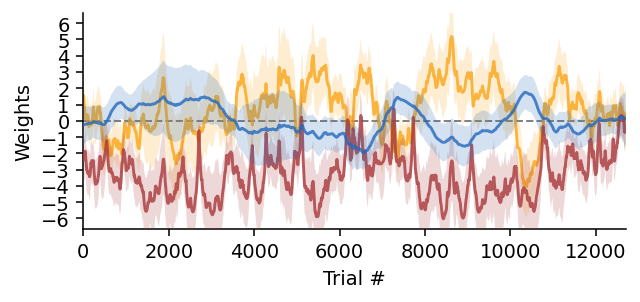

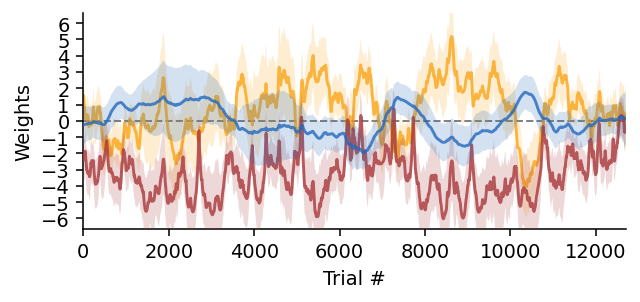

In [91]:
psy.plot_weights(wMode, weights, errorbar=hess_info["W_std"])

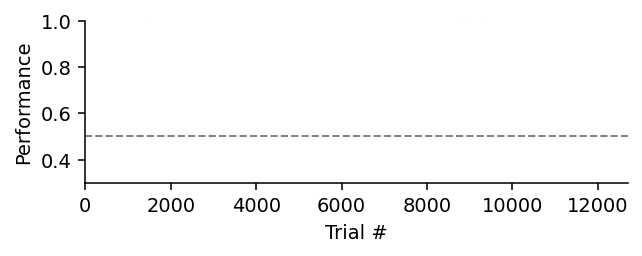

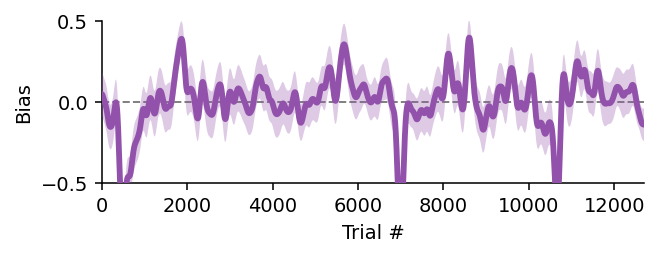

In [92]:
fig_perf = psy.plot_performance(new_D)
fig_bias = psy.plot_bias(new_D)

In [93]:
xval_logli, xval_pL = psy.crossValidate(new_D, hyper, weights, optList, F=10, seed=41)

Running xval fold 10 of 10

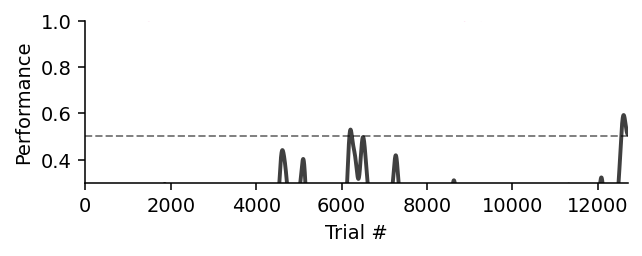

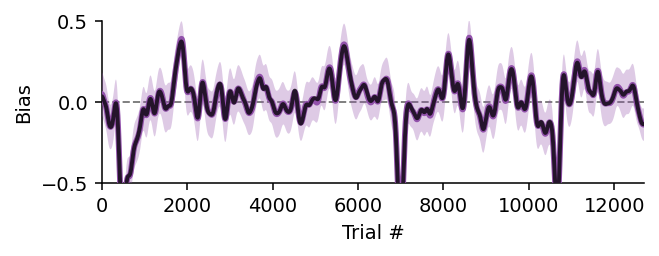

In [94]:
fig_perf_xval = psy.plot_performance(new_D, xval_pL=xval_pL)
fig_bias_xval = psy.plot_bias(new_D, xval_pL=xval_pL)